In [1]:
#Changing the working directory to the root
%cd ../

c:\Users\olarinoyem\Project\Multivate-forecasting


In [2]:
import numpy as np
import pandas as pd
import os
import missingno as msno
import warnings

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import plotly.express as px
import plotly.io as pio


from tqdm.autonotebook import tqdm
from IPython.display import display, HTML
pio.templates.default = "plotly_white"
np.random.seed()
tqdm.pandas()
warnings.filterwarnings("ignore")

C:\Users\olarinoyem\AppData\Local\Temp\ipykernel_24636\1268776355.py:15: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
data = pd.read_csv("data/model_data.csv").drop("Unnamed: 0", axis=1)
data.head()

,date,MV Beds Occupied,Hospital Cases,New Admissions,New COVID-19 Cases,Vax_index
0,2020-04-02,1494.0,12135.0,2932.0,4097,0.33
1,2020-04-03,1788.0,13635.0,2564.0,4102,0.33
2,2020-04-04,1950.0,15469.0,2593.0,3405,0.33
3,2020-04-05,2097.0,16657.0,2592.0,3094,0.33
4,2020-04-06,2264.0,17154.0,2679.0,4407,0.33


In [4]:
go_data = pd.read_csv("data/google_data.csv")
string_policy = go_data['stringency_index']

In [5]:
string_policy

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
986    NaN
987    NaN
988    NaN
989    NaN
990    NaN
Name: stringency_index, Length: 991, dtype: float64

In [6]:
data["stringency_index"] = string_policy
data.head()

,date,MV Beds Occupied,Hospital Cases,New Admissions,New COVID-19 Cases,Vax_index,stringency_index
0,2020-04-02,1494.0,12135.0,2932.0,4097,0.33,0.0
1,2020-04-03,1788.0,13635.0,2564.0,4102,0.33,0.0
2,2020-04-04,1950.0,15469.0,2593.0,3405,0.33,0.0
3,2020-04-05,2097.0,16657.0,2592.0,3094,0.33,0.0
4,2020-04-06,2264.0,17154.0,2679.0,4407,0.33,0.0


In [7]:
data['date'] = pd.to_datetime(data['date'])
data.rename(columns={'MV Beds Occupied':'MV_beds_usage', 'Hospital Cases':'Hospital_cases', 'New Admissions':'New_admissions', 'New COVID-19 Cases':'COVID_PosCases'}, inplace=True)

<Axes: >

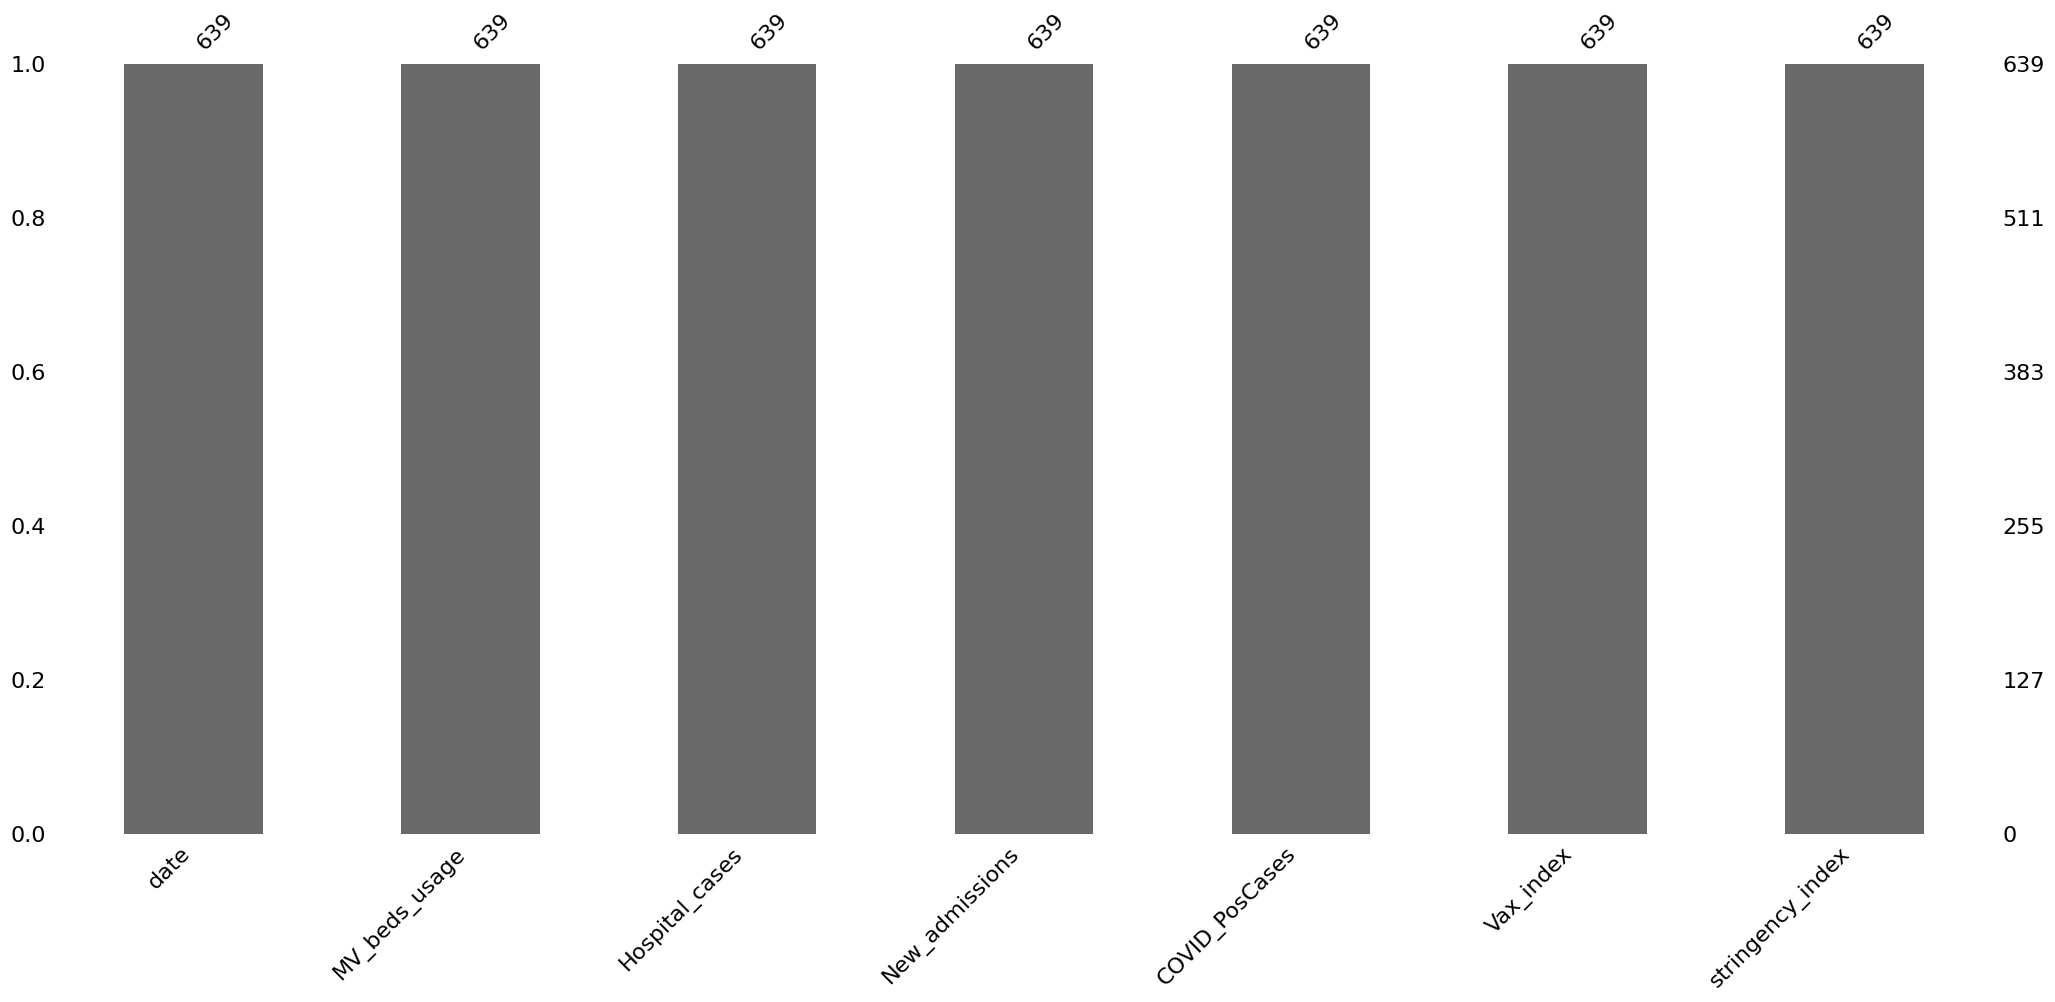

In [8]:
msno.bar(data)

In [9]:
from src.utils import plotting_utils
def format_plot(fig, legends = None, xlabel="Time", ylabel="Value", figsize=(500,900), font_size=15, title_font_size=20):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=figsize[1],
            height=figsize[0],
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": 20
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text=ylabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text=xlabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            )
        )
    return fig

In [10]:
zoomWindow = slice("2020", "2021")
fig = plotting_utils.two_line_plot_secondary_axis(x= data.index,
                                                  y1=data["MV_beds_usage"],
                                                  y2=data["New_admissions"],
                                        
                                                  y1_name="Mechanical ventilators usage",
                                                  y2_name="New hospital admission",
                    
                                                  title="COVID-19",
                                                  dash_secondary=False)

fig.show()

In [11]:
data.head()

,date,MV_beds_usage,Hospital_cases,New_admissions,COVID_PosCases,Vax_index,stringency_index
0,2020-04-02,1494.0,12135.0,2932.0,4097,0.33,0.0
1,2020-04-03,1788.0,13635.0,2564.0,4102,0.33,0.0
2,2020-04-04,1950.0,15469.0,2593.0,3405,0.33,0.0
3,2020-04-05,2097.0,16657.0,2592.0,3094,0.33,0.0
4,2020-04-06,2264.0,17154.0,2679.0,4407,0.33,0.0


'images/trend_analysis_improved.pdf'

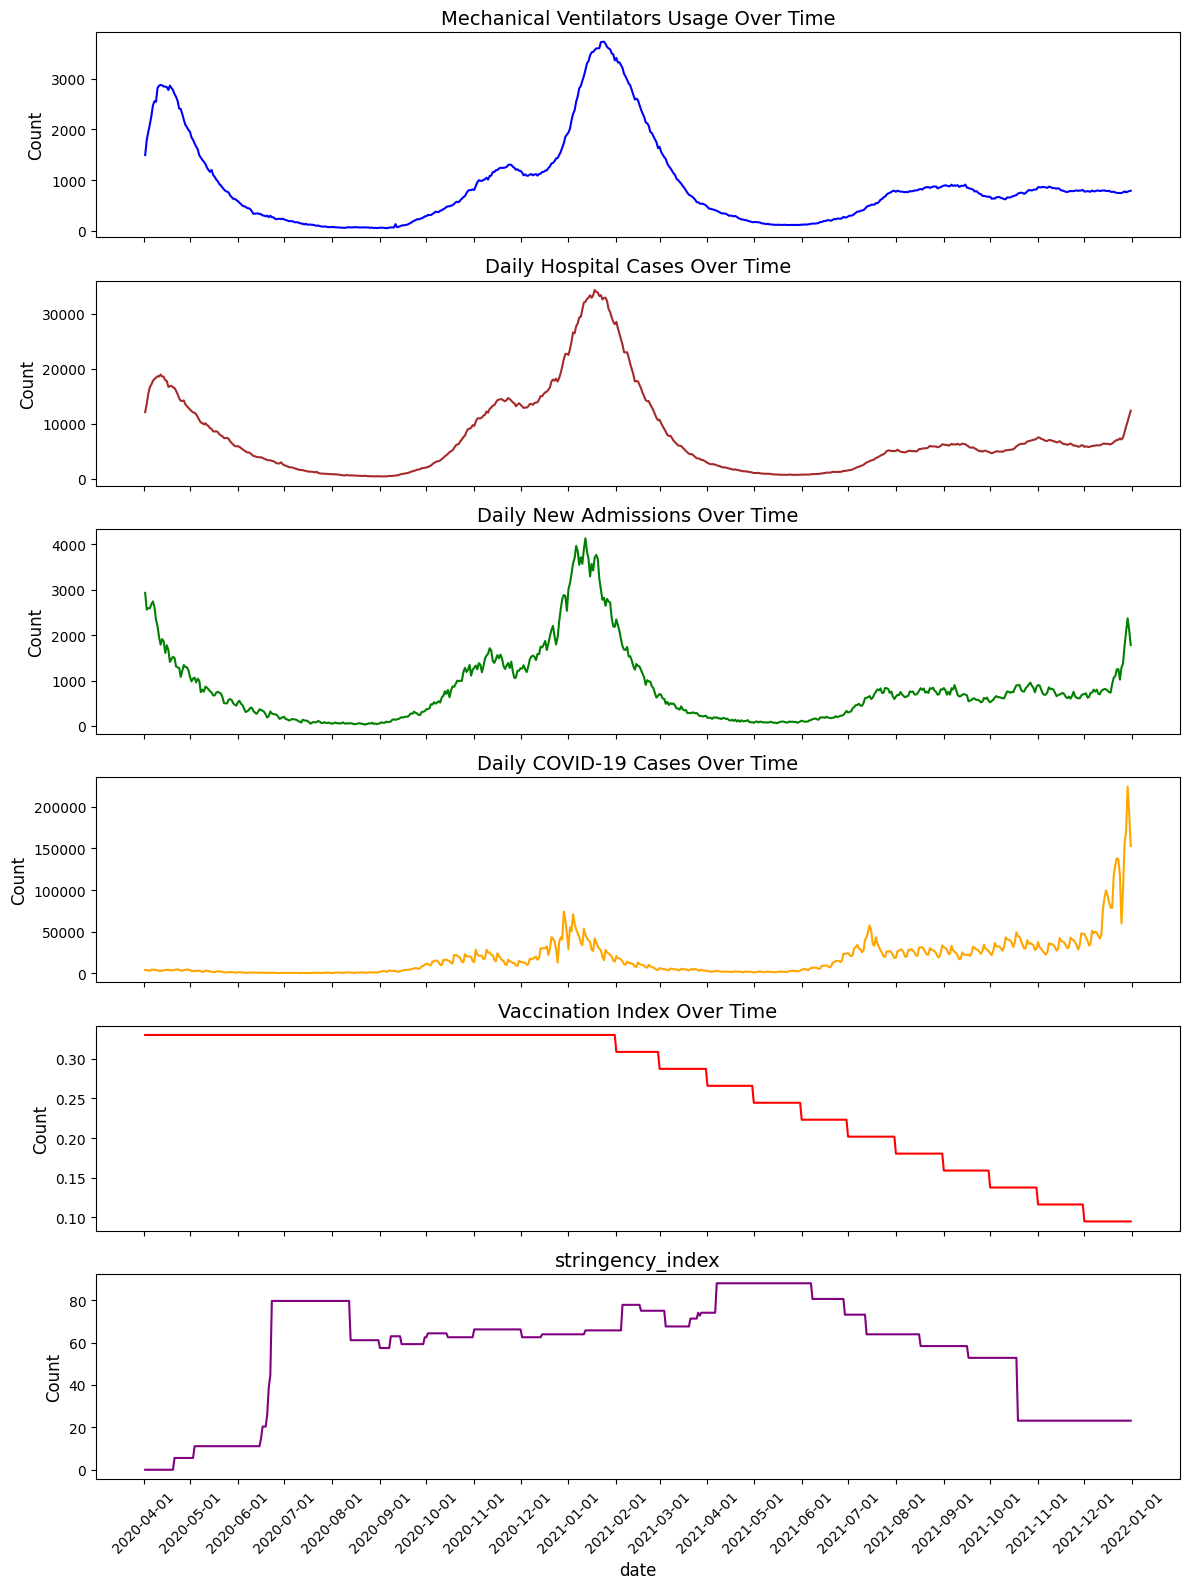

In [12]:
data_image = data[(data['date'] >= '2020-01-01') & (data['date'] <= '2021-12-31')]

# Prepare the figure and subplots with improved readability
fig, axs = plt.subplots(6, 1, figsize=(12, 16), sharex=True)
fig.subplots_adjust(hspace=0.5)

# Define plot details
metrics = ['MV_beds_usage', 'Hospital_cases', 'New_admissions', 
           'COVID_PosCases', 'Vax_index', 'stringency_index']
colors = ['blue', 'brown', 'green', 'orange', 'red', 'purple']
titles = ['Mechanical Ventilators Usage Over Time', 'Daily Hospital Cases Over Time', 
          'Daily New Admissions Over Time', 'Daily COVID-19 Cases Over Time', 
     'Vaccination Index Over Time', 'stringency_index']

# Plot each metric
for ax, metric, color, title in zip(axs, metrics, colors, titles):
    ax.plot(data_image['date'], data_image[metric], color=color)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='both', labelsize=10)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator())

# Set common x-label
axs[-1].set_xlabel('date', fontsize=12)

# Improve overall layout
plt.tight_layout()

# Save the figure as a PDF
pdf_path_improved = 'images/trend_analysis_improved.pdf'
with PdfPages(pdf_path_improved) as pdf:
    pdf.savefig(fig, bbox_inches='tight')

pdf_path_improved

In [13]:
data = data.set_index('date')

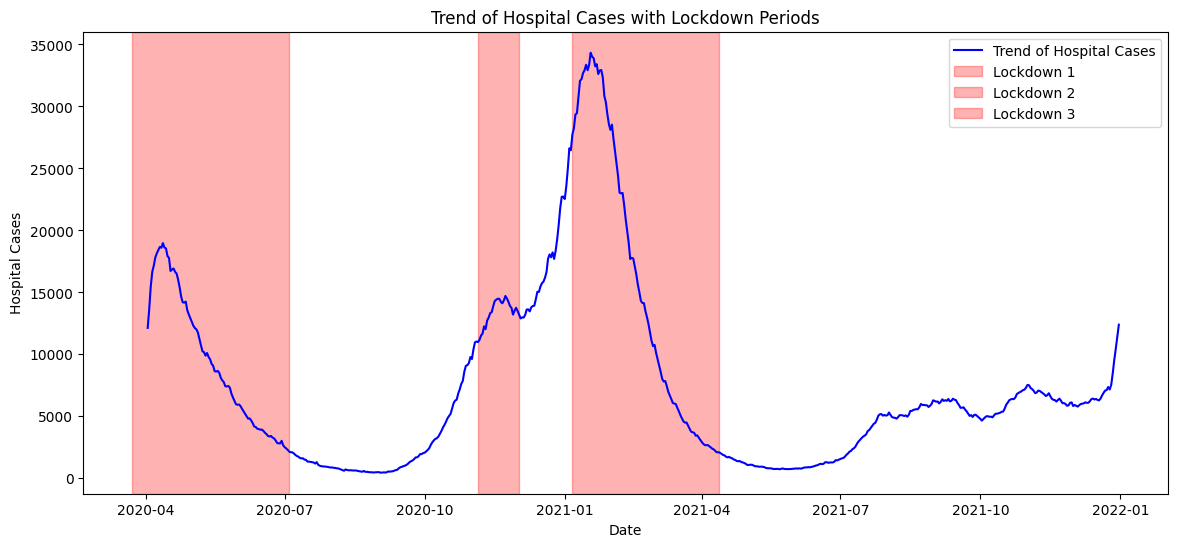

In [14]:
lockdown_dates = {
    'Lockdown 1': {'start': '2020-03-23', 'end': '2020-07-04'},
    'Lockdown 2': {'start': '2020-11-05', 'end': '2020-12-02'},
    'Lockdown 3': {'start': '2021-01-06', 'end': '2021-04-12'}
}

# Converting dates to datetime for plotting
for lockdown in lockdown_dates:
    lockdown_dates[lockdown]['start'] = pd.to_datetime(lockdown_dates[lockdown]['start'])
    lockdown_dates[lockdown]['end'] = pd.to_datetime(lockdown_dates[lockdown]['end'])
    # Plotting the trend component with lockdown periods
plt.figure(figsize=(14, 6))
plt.plot(data["Hospital_cases"], label='Trend of Hospital Cases', color='blue')

# Adding shaded areas for lockdown periods
for lockdown in lockdown_dates:
    plt.axvspan(lockdown_dates[lockdown]['start'], lockdown_dates[lockdown]['end'], color='red', alpha=0.3, label=lockdown)

plt.xlabel('Date')
plt.ylabel('Hospital Cases')
plt.title('Trend of Hospital Cases with Lockdown Periods')
plt.legend()
plt.show()

In [15]:
correlation_matrix = data.corr('spearman')

fig = px.imshow(correlation_matrix,
                text_auto=True,
                aspect="auto",
                color_continuous_scale="RdBu_r",
                labels=dict(x="Feature", y="Feature", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns)

# Update layout for a better appearance
fig.update_layout(title='Correlation Matrix Heatmap',
                  xaxis_title='Features',
                  yaxis_title='Features')

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose


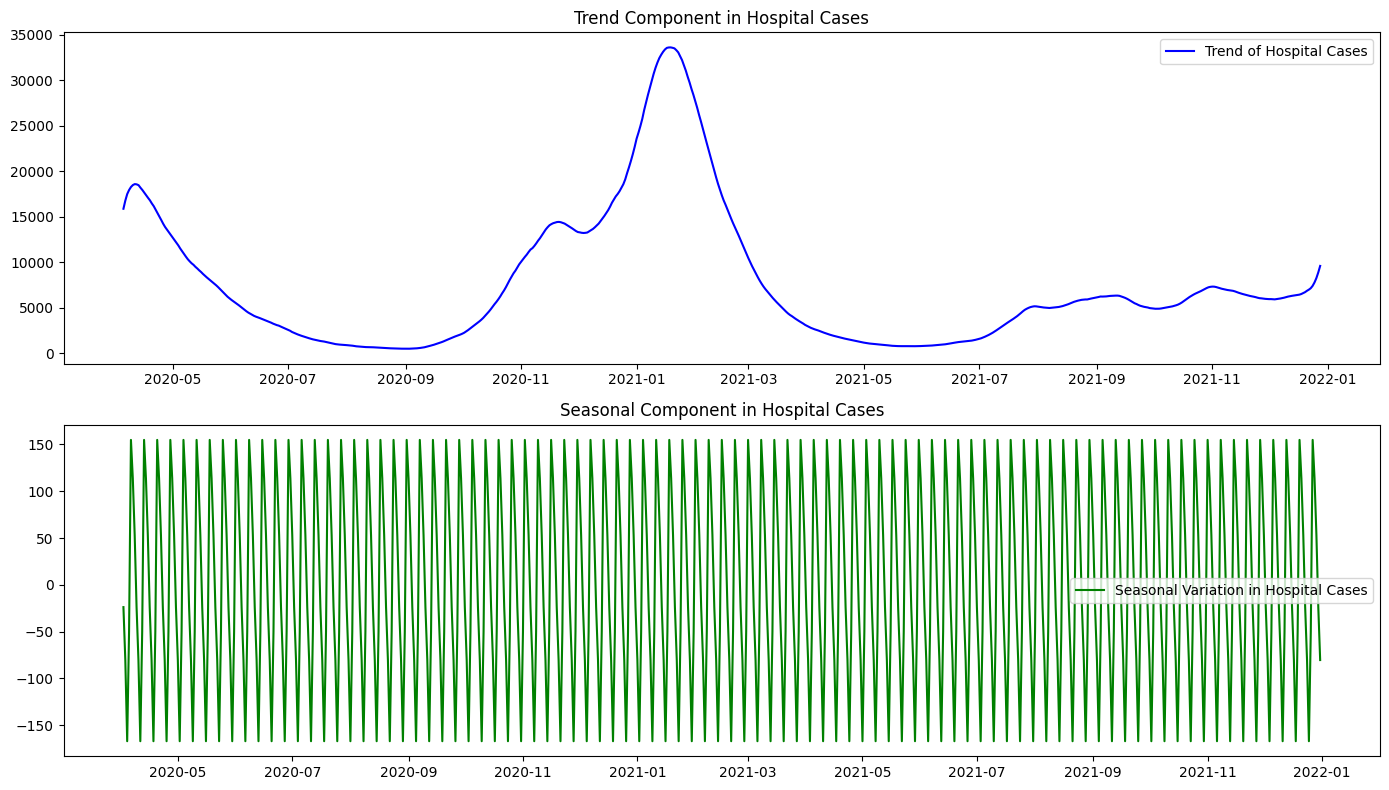

In [17]:
data_interpolated = data.asfreq('D')

# Re-performing seasonal decomposition on 'Hospital Cases' with defined frequency
decomposition_hospital_cases = seasonal_decompose(data_interpolated['Hospital_cases'], model='additive')

# Extracting the seasonal and trend components
seasonal_hospital_cases = decomposition_hospital_cases.seasonal
trend_hospital_cases = decomposition_hospital_cases.trend

# Plotting the trend and seasonal components
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(trend_hospital_cases, label='Trend of Hospital Cases', color='blue')
plt.title('Trend Component in Hospital Cases')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(seasonal_hospital_cases, label='Seasonal Variation in Hospital Cases', color='green')
plt.title('Seasonal Component in Hospital Cases')
plt.legend()

plt.tight_layout()
plt.show()
